In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [0]:
%cd 'drive/My Drive'


#Download Dataset

In [0]:
!wget https://www.dropbox.com/s/fwn42pc55e388a1/keras-covid-19.zip?dl=0 -O keras-covid-19.zip


--2020-04-21 23:30:07--  https://www.dropbox.com/s/fwn42pc55e388a1/keras-covid-19.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fwn42pc55e388a1/keras-covid-19.zip [following]
--2020-04-21 23:30:08--  https://www.dropbox.com/s/raw/fwn42pc55e388a1/keras-covid-19.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc91b910d648d3fb1809c0b4a1df.dl.dropboxusercontent.com/cd/0/inline/A2RC9wDPjP1JCYREk10Ygq3NCXEKpuYhNZBABBfM7-1RAsiMK_joe_A0KiAVjSfVX1mT5O1tlWHeCokMU72H-zFlz0vtWo7G12Chqk34EgzeLW_uF5BywfdjVBBwWkvklmo/file# [following]
--2020-04-21 23:30:08--  https://uc91b910d648d3fb1809c0b4a1df.dl.dropboxusercontent.com/cd/0/inline/A2RC9wDPjP1JCYREk10Ygq3NCXEKpuYhNZBABBfM7-1RAsiMK_joe_A0KiAVjSfVX1mT5O1tlWHeCokMU72H-zFl

In [0]:
!unzip keras-covid-19.zip


Archive:  keras-covid-19.zip
replace keras-covid-19/build_covid_dataset.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#importing needed libraries

In [0]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from os import listdir
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
dataset = "keras-covid-19/dataset"
plot = "keras-covid-19/plot.png" 
model = "keras-covid-19/covid19.model"

In [0]:
args={}
args["dataset"]=dataset
args["plot"]=plot
args["model"]=model

#Data Visualization

## covid patient

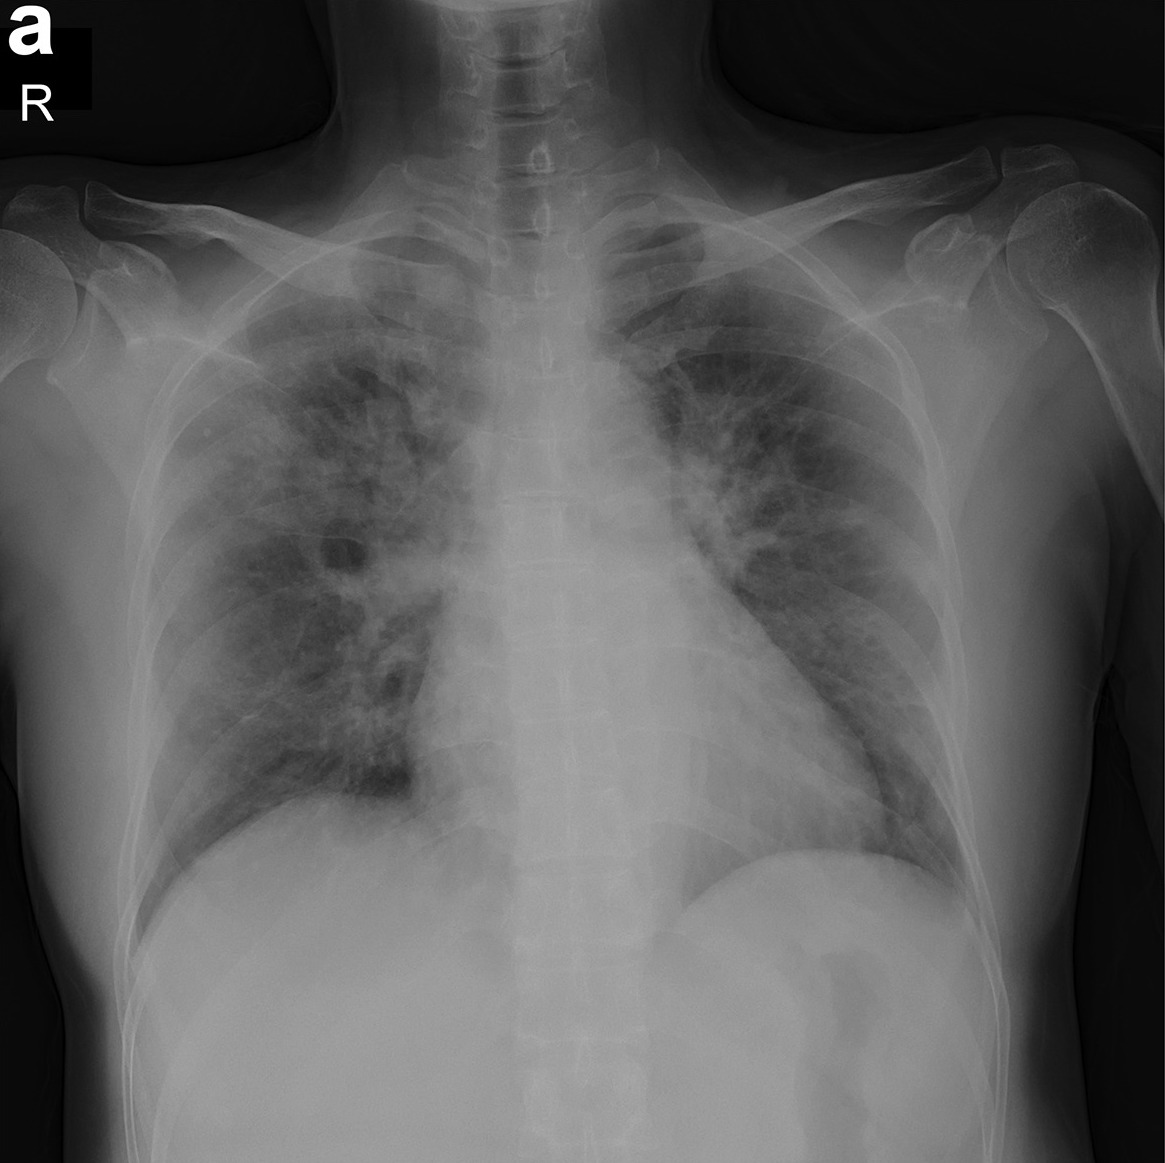

In [0]:
from IPython.display import Image, display
display(Image('keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg',width=420))

##normal patient

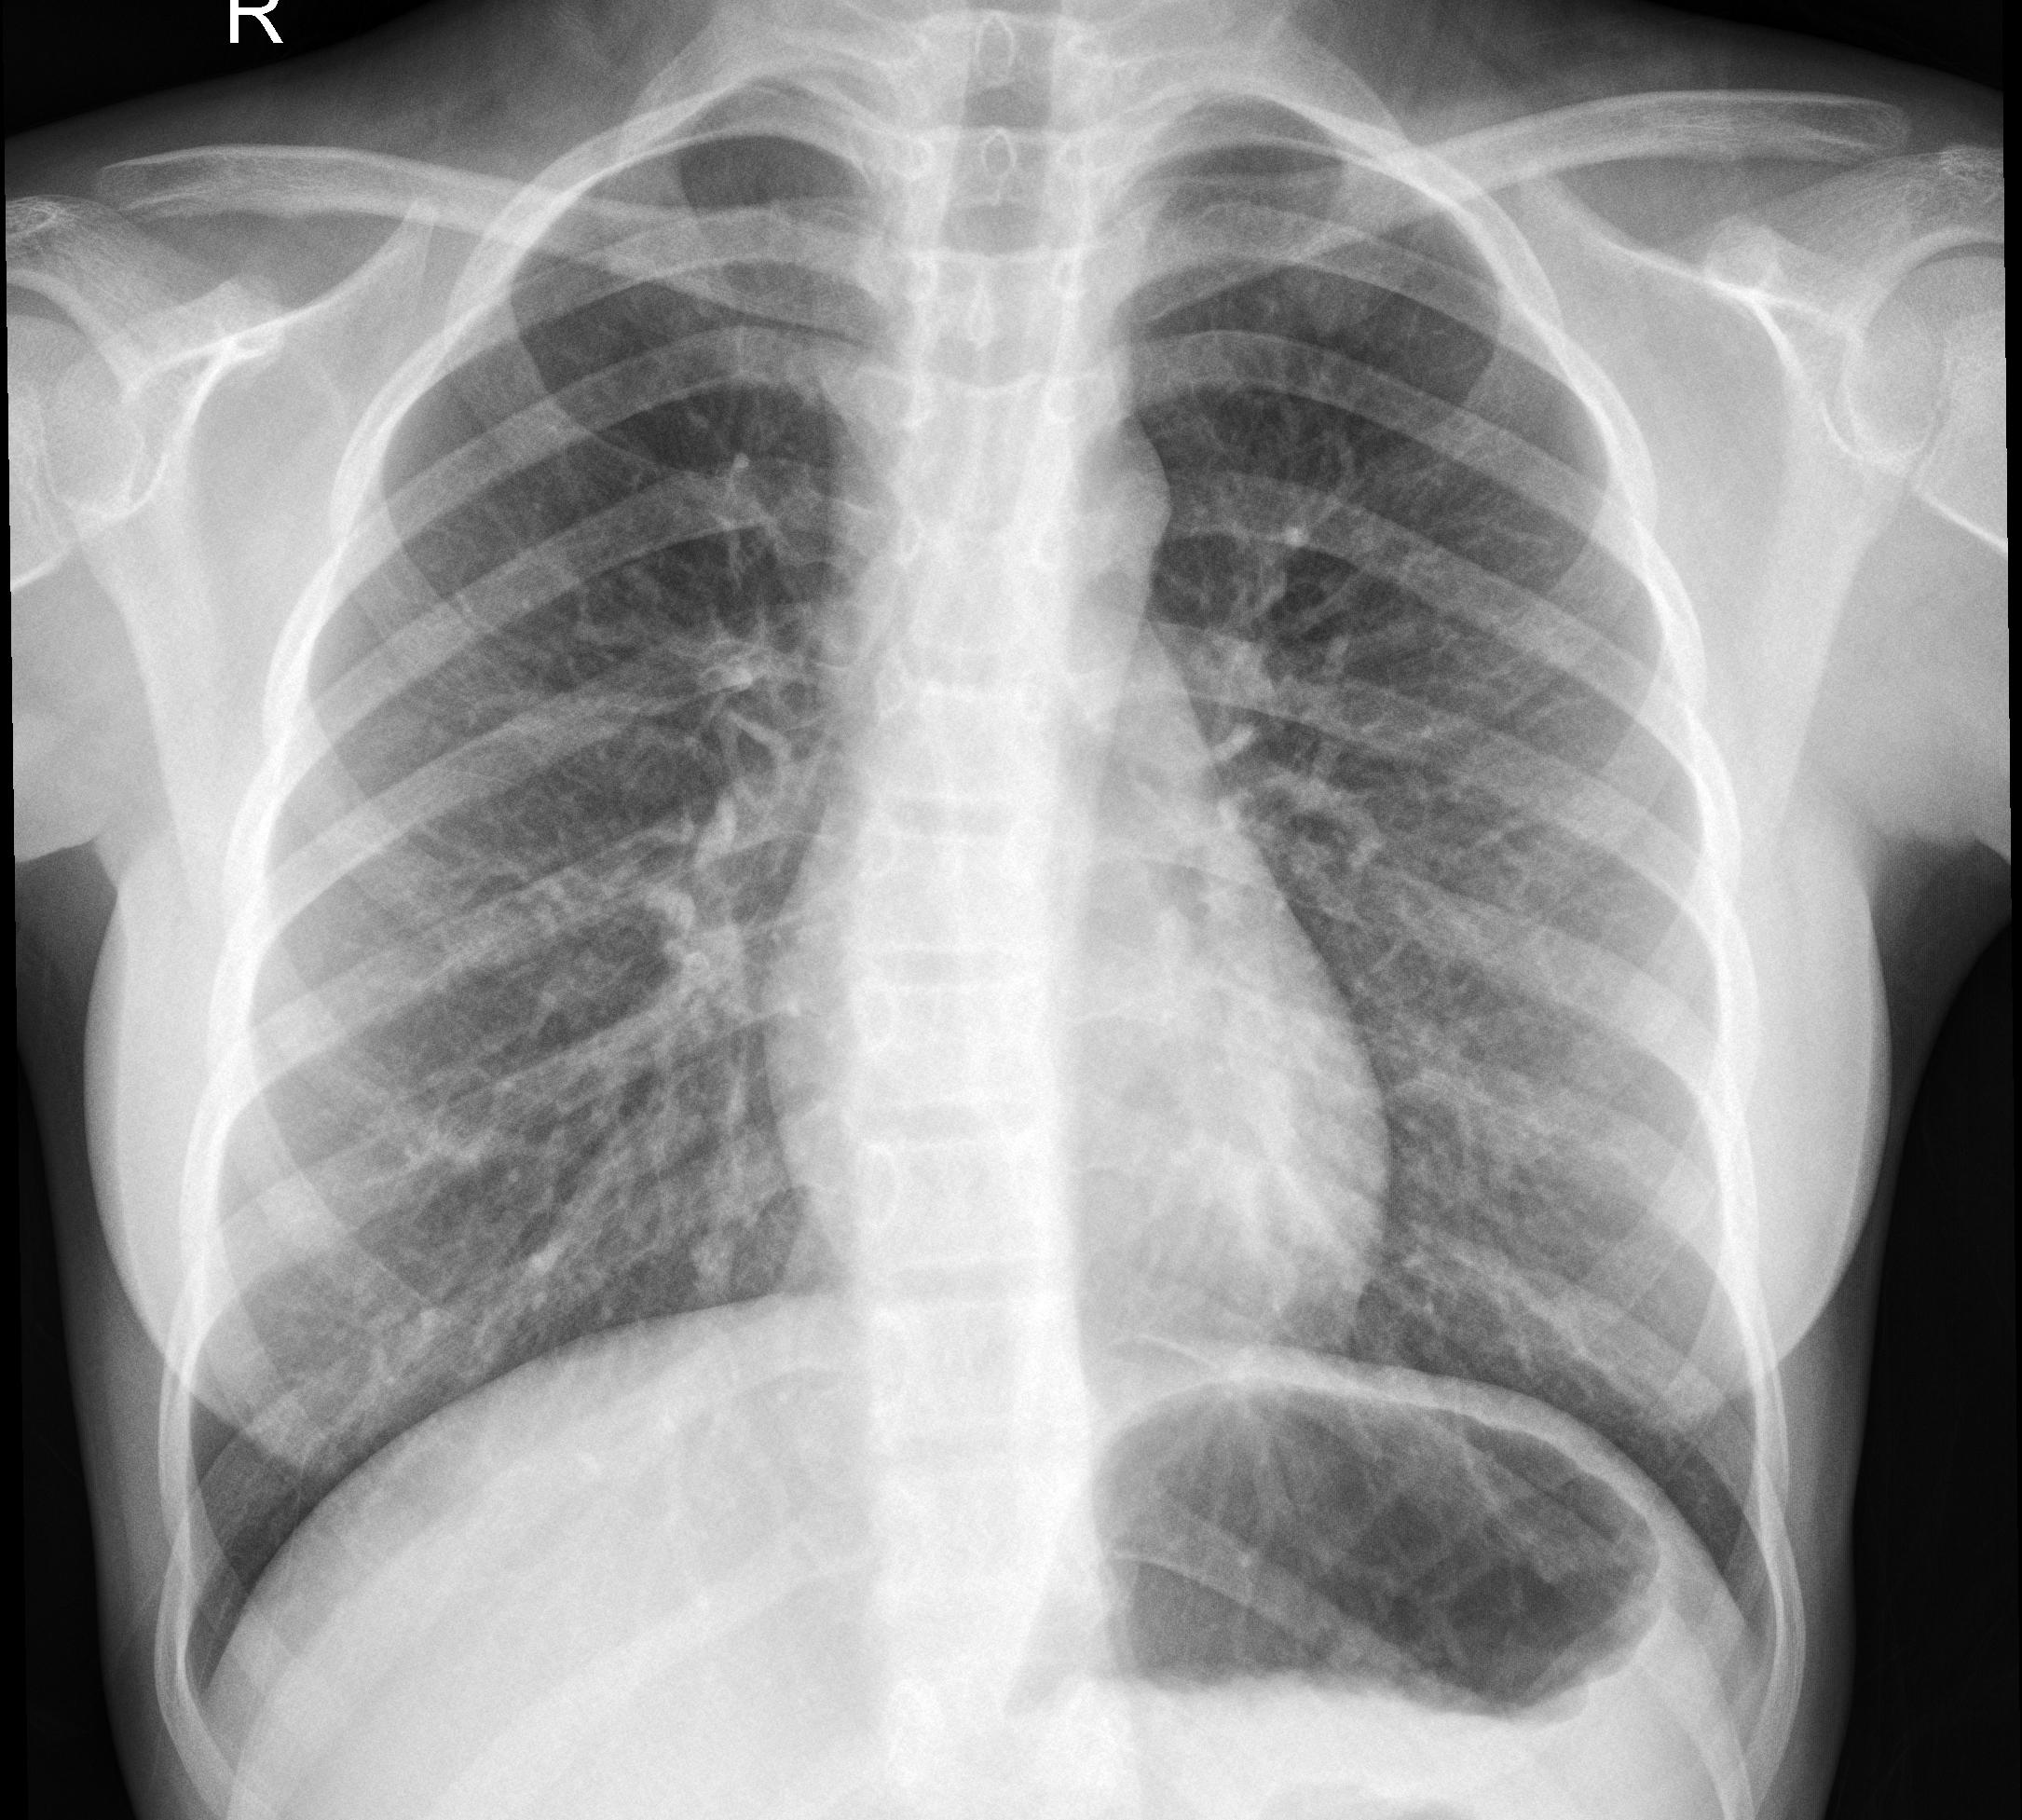

In [0]:
from IPython.display import Image, display
display(Image('keras-covid-19/dataset/normal/IM-0033-0001-0001.jpeg',width=420))

# Loading Data and preprocessing

In [0]:
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []
print(imagePaths)
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	data.append(image)
	labels.append(label)
data = np.array(data) /255
labels = np.array(labels)

['keras-covid-19/dataset/normal/person339_bacteria_1574.jpeg', 'keras-covid-19/dataset/normal/person925_virus_1582.jpeg', 'keras-covid-19/dataset/normal/person651_bacteria_2543.jpeg', 'keras-covid-19/dataset/normal/person1558_bacteria_4066.jpeg', 'keras-covid-19/dataset/normal/person1830_bacteria_4693.jpeg', 'keras-covid-19/dataset/normal/person934_virus_1595.jpeg', 'keras-covid-19/dataset/normal/NORMAL2-IM-0869-0001.jpeg', 'keras-covid-19/dataset/normal/person612_bacteria_2478.jpeg', 'keras-covid-19/dataset/normal/person989_virus_1667.jpeg', 'keras-covid-19/dataset/normal/IM-0033-0001-0001.jpeg', 'keras-covid-19/dataset/normal/person1935_bacteria_4849.jpeg', 'keras-covid-19/dataset/normal/NORMAL2-IM-0315-0001.jpeg', 'keras-covid-19/dataset/normal/person1_bacteria_2.jpeg', 'keras-covid-19/dataset/normal/NORMAL2-IM-1179-0001.jpeg', 'keras-covid-19/dataset/normal/person438_bacteria_1893.jpeg', 'keras-covid-19/dataset/normal/person939_bacteria_2864.jpeg', 'keras-covid-19/dataset/normal/IM

#Labels categorize, split dataset and data agumentation

In [0]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)


trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


#fine-tunning VGG16

In [0]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
5/5 [==============================] - 1s 287ms/step - loss: 0.8696 - accuracy: 0.4250 - val_loss: 0.7196 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 1s 105ms/step - loss: 0.7776 - accuracy: 0.5000 - val_loss: 0.6857 - val_accuracy: 0.7000
Epoch 3/25
5/5 [==============================] - 1s 103ms/step - loss: 0.7005 - accuracy: 0.5000 - val_loss: 0.6793 - val_accuracy: 0.6000
Epoch 4/25
5/5 [==============================] - 1s 111ms/step - loss: 0.6719 - accuracy: 0.5250 - val_loss: 0.6592 - val_accuracy: 0.6000
Epoch 5/25
5/5 [==============================] - 1s 102ms/step - loss: 0.7084 - accuracy: 0.4750 - val_loss: 0.6398 - val_accuracy: 0.8000
Epoch 6/25
5/5 [==============================] - 1s 101ms/step - loss: 0.6393 - accuracy: 0.6250 - val_loss: 0.6180 - val_accuracy: 0.6000
Epoch 7/25
5/5 [==============================] - 1s 105ms/step - loss: 0.6458 - acc

#Evaluate Model

##calc precision, recall, f1score 

In [0]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

              precision    recall  f1-score   support

       covid       0.80      0.80      0.80         5
      normal       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



##confusion matrix

In [0]:
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)

total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[4 1]
 [1 4]]
acc: 0.8000
sensitivity: 0.8000
specificity: 0.8000


#performance visualisation

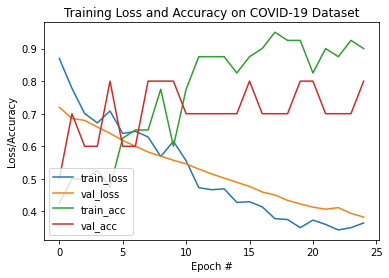

In [0]:
N = EPOCHS
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])